<a href="https://colab.research.google.com/github/SriRamK345/E-Commerce-Marketing/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/content/drive/MyDrive/E-Commerce Marketing/ConsumerElectronics.csv")
df.head()

fsn_id           order_date  Year  Month      order_id  \
0  ACCCX3S58G7B5F6P  2015-10-17 15:11:54  2015     10  3.419301e+15   
1  ACCCX3S58G7B5F6P  2015-10-19 10:07:22  2015     10  1.420831e+15   
2  ACCCX3S5AHMF55FV  2015-10-20 15:45:56  2015     10  2.421913e+15   
3  ACCCX3S5AHMF55FV  2015-10-14 12:05:15  2015     10  4.416592e+15   
4  ACCCX3S5AHMF55FV  2015-10-17 21:25:03  2015     10  4.419525e+15   

   order_item_id   gmv  units deliverybdays deliverycdays  \
0   3.419301e+15  6400      1            \N            \N   
1   1.420831e+15  6900      1            \N            \N   
2   2.421913e+15  1990      1            \N            \N   
3   4.416592e+15  1690      1            \N            \N   
4   4.419525e+15  1618      1            \N            \N   

  s1_fact.order_payment_type  sla                 cust_id  \
0                        COD    5  -1.01299130778588E+018   
1                        COD    7  -8.99032457905512E+018   
2                        COD   10   -1.0404429420466E+018   
3                    Prepaid    4  -7.60496084352714E+018   
4                    Prepaid    6    2.8945572083453E+018   

                  pincode product_analytic_super_category  \
0  -7.79175582905735E+018                              CE   
1   7.33541149097431E+018                              CE   
2  -7.47768776228657E+018                              CE   
3  -5.83593163877661E+018                              CE   
4   5.34735360997242E+017                              CE   

  product_analytic_category product_analytic_sub_category  \
0           CameraAccessory               CameraAccessory   
1           CameraAccessory               CameraAccessory   
2           CameraAccessory               CameraAccessory   
3           CameraAccessory               CameraAccessory   
4           CameraAccessory               CameraAccessory   

  product_analytic_vertical  product_mrp  product_procurement_sla  
0              CameraTripod         7190                        0  
1              CameraTripod         7190                        0  
2              CameraTripod         2099                        3  
3              CameraTripod         2099                        3  
4              CameraTripod         2099                        3

In [4]:
df.shape

(1648824, 20)

In [5]:
df.drop_duplicates(inplace= True,)
print(df.shape)

(1543981, 20)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1543981 entries, 0 to 1543996
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   fsn_id                           1543981 non-null  object 
 1   order_date                       1543981 non-null  object 
 2   Year                             1543981 non-null  int64  
 3   Month                            1543981 non-null  int64  
 4   order_id                         1543981 non-null  float64
 5   order_item_id                    1543981 non-null  float64
 6   gmv                              1543981 non-null  object 
 7   units                            1543981 non-null  int64  
 8   deliverybdays                    1543981 non-null  object 
 9   deliverycdays                    1543981 non-null  object 
 10  s1_fact.order_payment_type       1543981 non-null  object 
 11  sla                              1543981 non-null  int6

In [7]:
df["product_analytic_category"].unique()

array(['CameraAccessory', 'GamingHardware', 'EntertainmentSmall',
       'GameCDDVD', 'Camera'], dtype=object)

In [8]:
df["product_analytic_sub_category"].unique()

array(['CameraAccessory', 'GamingAccessory', 'Speaker', 'HomeAudio',
       'CameraStorage', 'AmplifierReceiver', 'AudioMP3Player', 'Game',
       'Camera', 'GamingConsole', 'HomeTheatre', 'AudioAccessory',
       'TVVideoSmall', 'GameMembershipCards'], dtype=object)

In [9]:
df["gmv"].value_counts()

gmv
999.0      23738
999        16557
169        16341
299.0      13535
1299.0     12508
           ...  
28749.0        1
33204.0        1
16420          1
10962.0        1
3225           1
Name: count, Length: 18086, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1543981 entries, 0 to 1543996
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   fsn_id                           1543981 non-null  object 
 1   order_date                       1543981 non-null  object 
 2   Year                             1543981 non-null  int64  
 3   Month                            1543981 non-null  int64  
 4   order_id                         1543981 non-null  float64
 5   order_item_id                    1543981 non-null  float64
 6   gmv                              1543981 non-null  object 
 7   units                            1543981 non-null  int64  
 8   deliverybdays                    1543981 non-null  object 
 9   deliverycdays                    1543981 non-null  object 
 10  s1_fact.order_payment_type       1543981 non-null  object 
 11  sla                              1543981 non-null  int6

## Handling

In [11]:
# Convert 'gmv' to numeric (forcing errors to NaN if any invalid values)
df['gmv'] = pd.to_numeric(df['gmv'], errors='coerce')

In [12]:
# Convert 'order_date' to datetime format
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

In [13]:
# Replace invalid entries ('\\N') in 'deliverybdays' and 'deliverycdays' with NaN
df['deliverybdays'] = df['deliverybdays'].replace('\\N', np.NaN)
df['deliverycdays'] = df['deliverycdays'].replace('\\N', np.NaN)

In [14]:
df.sample(10)

fsn_id          order_date  Year  Month      order_id  \
1419747  AVMDX6TFZZQM7SXJ 2015-07-31 22:11:20  2015      7  1.788091e+08   
842204   ACCEBVP25HR7ZHGK 2016-03-06 22:51:02  2016      3  4.541397e+15   
1473255  ACCE38PKM89HH69W 2015-09-23 21:58:57  2015      9  2.398807e+15   
130011   ACCEBQYS6MUHFRJU 2015-10-06 21:42:43  2015     10  4.410009e+15   
228344   ACCDVZ83VBHCWFFA 2015-11-21 21:49:32  2015     11  2.449780e+15   
259475   ACCE6VGHYKYFX4WB 2015-11-07 11:53:32  2015     11  4.437327e+15   
1221833  SELEHC8C5ZQBCWHX 2016-05-09 20:17:02  2016      5  4.596600e+15   
657996   ACCDVZ83VBHCWFFA 2016-02-03 15:54:12  2016      2  4.513499e+15   
382974   ACCE6VGHYKYFX4WB 2015-12-01 23:55:42  2015     12  3.458496e+15   
1392647  ACCE5HWKFXWKBG5X 2015-07-30 09:37:27  2015      7  1.780016e+08   

         order_item_id     gmv  units deliverybdays deliverycdays  \
1419747   2.253690e+08  2549.0      1           NaN           NaN   
842204    4.541397e+15   299.0      1           NaN           NaN   
1473255   2.398807e+15  1699.0      1           NaN           NaN   
130011    4.410009e+15   710.0      1           NaN           NaN   
228344    2.449780e+15  2583.0      1           NaN           NaN   
259475    4.437327e+15   169.0      1           NaN           NaN   
1221833   4.596600e+15  3399.0      1             5             5   
657996    4.513499e+15  2599.0      1           NaN           NaN   
382974    3.458496e+15   169.0      1           NaN           NaN   
1392647   2.244615e+08  1799.0      1           NaN           NaN   

        s1_fact.order_payment_type  sla                 cust_id  \
1419747                        COD    6   6.10891710590449E+018   
842204                         COD    6   9152295010838750208.0   
1473255                    Prepaid    4  -6.41294283185063E+018   
130011                         COD    8   -1.1638092654509E+018   
228344                         COD    2      3.88829392113E+018   
259475                         COD    3   7.58069515516814E+018   
1221833                        COD    1   7732306278912029696.0   
657996                         COD    2  -8603845020574359552.0   
382974                         COD    2   9097516690088819712.0   
1392647                        COD    8  -7.26225967929562E+018   

                        pincode product_analytic_super_category  \
1419747   4.41209981028887E+018                              CE   
842204   -4586478387531449856.0                              CE   
1473255   3.23108155095816E+018                              CE   
130011    1.74230585139963E+018                              CE   
228344   -6.04441232763197E+018                              CE   
259475    2.74240416354696E+018                              CE   
1221833  -5294403962033850368.0                              CE   
657996    3481517987887300096.0                              CE   
382974    -200178400200868992.0                              CE   
1392647   1.45214785746179E+018                              CE   

        product_analytic_category product_analytic_sub_category  \
1419747                 GameCDDVD                          Game   
842204            CameraAccessory               CameraAccessory   
1473255        EntertainmentSmall                       Speaker   
130011             GamingHardware               GamingAccessory   
228344         EntertainmentSmall                     HomeAudio   
259475         EntertainmentSmall                       Speaker   
1221833        EntertainmentSmall                  TVVideoSmall   
657996         EntertainmentSmall                     HomeAudio   
382974         EntertainmentSmall                       Speaker   
1392647        EntertainmentSmall                       Speaker   

        product_analytic_vertical  product_mrp  product_procurement_sla  
1419747              PhysicalGame         4999                        5  
842204                      Flash         1933              

In [15]:
df.isnull().sum()

fsn_id                                   0
order_date                               0
Year                                     0
Month                                    0
order_id                                 0
order_item_id                            0
gmv                                   4038
units                                    0
deliverybdays                      1208179
deliverycdays                      1208178
s1_fact.order_payment_type               0
sla                                      0
cust_id                                  0
pincode                                  0
product_analytic_super_category          0
product_analytic_category                0
product_analytic_sub_category            0
product_analytic_vertical                0
product_mrp                              0
product_procurement_sla                  0
dtype: int64

In [16]:
df.dropna(subset=['gmv'], inplace=True)

In [17]:
df["deliverybdays"].value_counts().head(10)

deliverybdays
4     62056
5     60591
3     53686
6     48650
2     37512
7     25564
1     19855
8     12461
9      5927
10     2922
Name: count, dtype: int64

In [18]:
df["deliverycdays"].value_counts().head(10)

deliverycdays
5     56412
6     51927
4     50619
3     40495
7     38452
2     28174
8     23257
1     15428
9     13533
10     7289
Name: count, dtype: int64

In [19]:
# replacing nan values with 5, 6,7,8 in deliverycdays randomly
df["deliverybdays"].fillna(np.random.choice([4,5,3]), inplace=True)
df['deliverycdays'].fillna(np.random.choice([5,6,4]), inplace=True)

## Unique Values

In [20]:
unique_number = []
for i in df.columns:
    x = df[i].value_counts().count()
    unique_number.append(x)

pd.DataFrame(unique_number, index = df.columns, columns = ["Total Unique Values"])

Total Unique Values
fsn_id                                         21216
order_date                                   1152699
Year                                               2
Month                                             12
order_id                                     1497298
order_item_id                                1477119
gmv                                            12523
units                                             27
deliverybdays                                    143
deliverycdays                                    171
s1_fact.order_payment_type                         2
sla                                               60
cust_id                                      1253494
pincode                                        12972
product_analytic_super_category                    1
product_analytic_category                          5
product_analytic_sub_category                     14
product_analytic_vertical                         74
product_mrp                                     1929
product_procurement_sla                           17

## Data Preparation

Create ML & DL models for three product subcategories: camera accessory, home audio, and gaming accessory. Develop models at a weekly level for each sub-category.


In [21]:
sub_cat = ["CameraAccessory", "HomeAudio", "GamingAccessory"]
df_new = df[df["product_analytic_sub_category"].isin(sub_cat)]
df_new.sample(5)

fsn_id          order_date  Year  Month      order_id  \
558272   ACCEB2TZPGGBS8HZ 2016-01-30 11:44:08  2016      1  1.509897e+15   
829693   ACCEAFRZYJTGPEGY 2016-03-06 09:38:56  2016      3  4.540924e+15   
811953   ACCE62MTYYWEERNQ 2016-03-22 22:06:32  2016      3  4.555185e+15   
589291   ACCEF7FZDGPMMUHE 2016-01-04 15:14:29  2016      1  3.487558e+15   
1354956  ACCD7DHNSFCXGSZF 2015-07-28 23:45:29  2015      7  1.773986e+08   

         order_item_id    gmv  units deliverybdays deliverycdays  \
558272    1.509897e+15  250.0      1             3             5   
829693    4.540924e+15  189.0      1             3             5   
811953    4.555185e+15  439.0      1             3             5   
589291    3.487558e+15  389.0      1             3             5   
1354956   2.236415e+08  239.0      1             3             5   

        s1_fact.order_payment_type  sla                 cust_id  \
558272                         COD    4   4777984484218359808.0   
829693                         COD    7   7079915154962270208.0   
811953                     Prepaid    2   4996596857333409792.0   
589291                         COD    6  -6873824643220610048.0   
1354956                        COD    4  -7.37818319131409E+018   

                        pincode product_analytic_super_category  \
558272   -8392949814752900096.0                              CE   
829693    4669645374239689728.0                              CE   
811953     159581542850560992.0                              CE   
589291    8081032820135780352.0                              CE   
1354956  -2.89521934289024E+017                              CE   

        product_analytic_category product_analytic_sub_category  \
558272            CameraAccessory               CameraAccessory   
829693             GamingHardware               GamingAccessory   
811953             GamingHardware               GamingAccessory   
589291            CameraAccessory               CameraAccessory   
1354956            GamingHardware               GamingAccessory   

        product_analytic_vertical  product_mrp  product_procurement_sla  
558272                      Flash          999                        4  
829693              GamingHeadset          149                        2  
811953                GamingMouse          800                        5  
589291       CameraBatteryCharger          500                        3  
1354956                   GamePad          499                        2

In [22]:
df_new.shape

(527280, 20)

In [23]:
df.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 'deliverybdays', 'deliverycdays',
       's1_fact.order_payment_type', 'sla', 'cust_id', 'pincode',
       'product_analytic_super_category', 'product_analytic_category',
       'product_analytic_sub_category', 'product_analytic_vertical',
       'product_mrp', 'product_procurement_sla'],
      dtype='object')

In [24]:
unique_number = []
for i in df_new.columns:
    x = df_new[i].value_counts().count()
    unique_number.append(x)

pd.DataFrame(unique_number, index = df_new.columns, columns = ["Total Unique Values"])

Total Unique Values
fsn_id                                          9099
order_date                                    460448
Year                                               2
Month                                             12
order_id                                      511434
order_item_id                                 506664
gmv                                             6460
units                                             20
deliverybdays                                     42
deliverycdays                                     48
s1_fact.order_payment_type                         2
sla                                               39
cust_id                                       451798
pincode                                        11319
product_analytic_super_category                    1
product_analytic_category                          3
product_analytic_sub_category                      3
product_analytic_vertical                         51
product_mrp                                     1387
product_procurement_sla                           16

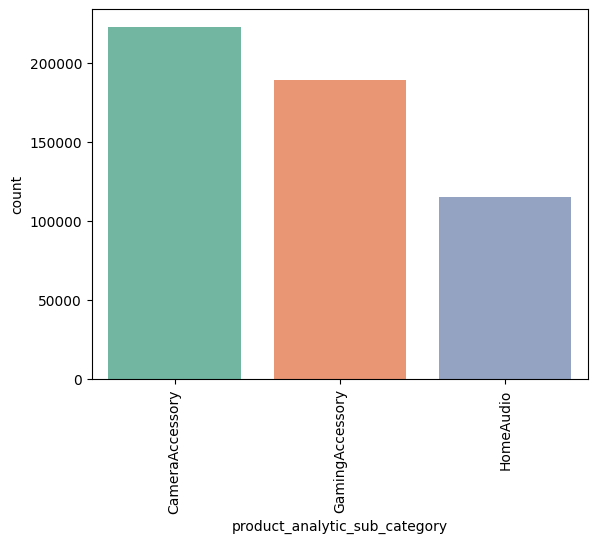

In [25]:
# product_analytic_sub_category
sns.countplot(data=df_new, x='product_analytic_sub_category', palette="Set2")
plt.xticks(rotation=90)
plt.show()

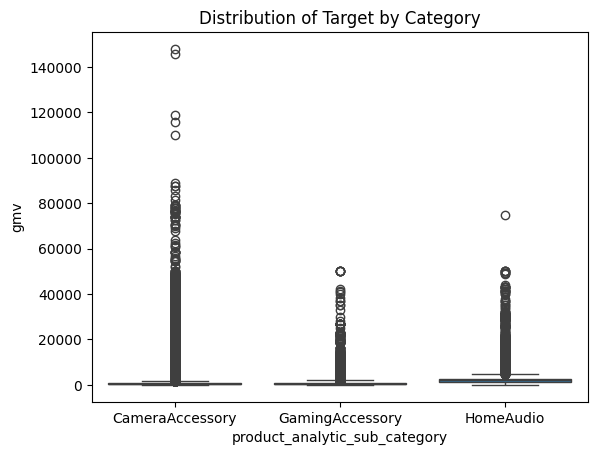

In [26]:
sns.boxplot(x='product_analytic_sub_category', y='gmv', data=df_new)
plt.title('Distribution of Target by Category')
plt.xlabel('product_analytic_sub_category')
plt.ylabel('gmv')
plt.show()

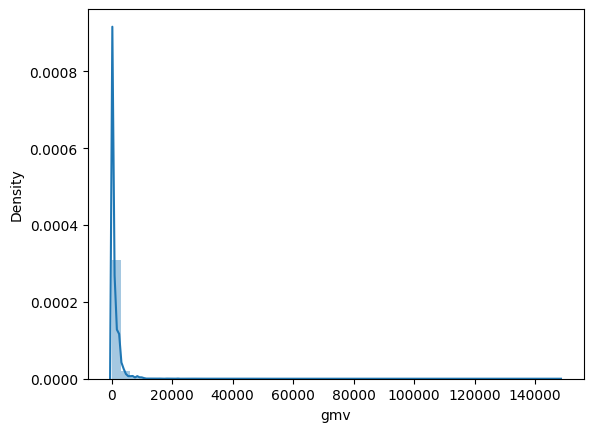

In [27]:
sns.distplot(df_new['gmv'])
plt.show()

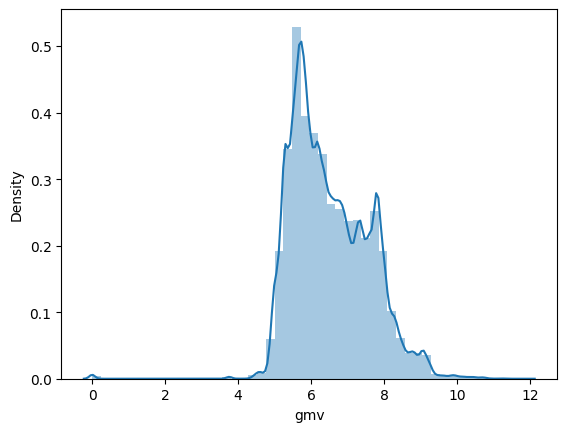

In [28]:
sns.distplot(np.log(df_new['gmv']+1))
plt.show()

Skewness of the data suggests that the data is fairly symmetrical and positive whereas kurtosis value is < 3.

In [29]:
from scipy.stats import skew,kurtosis
print("Skewness of the gmv:",skew(np.log(df_new['gmv']+1)))
print("Excess Kurtosis of the gmv:",kurtosis(np.log(df_new['gmv']+1)))

Skewness of the gmv: 0.33060035998532206
Excess Kurtosis of the gmv: 1.2784010054026096


In [30]:
px.box(df_new, y="gmv")

In [31]:
filtered_df = df_new[df_new["gmv"] >=100000]
filtered_df.head()

fsn_id          order_date  Year  Month      order_id  \
337844   ACCCX3SGGDGTHA2C 2015-12-31 10:12:50  2015     12  4.483916e+15   
640148   ACCCX3SGGAMUVJHX 2016-02-03 15:04:07  2016      2  1.513467e+15   
640149   ACCCX3SGGAMUVJHX 2016-02-11 18:58:39  2016      2  1.520522e+15   
1071987  ACCCX3SGUFHGMYWS 2016-05-20 15:01:46  2016      5  1.605917e+15   
1241127  ACCDY4UMEU46EP5Q 2016-06-02 20:59:08  2016      6  3.617365e+15   

         order_item_id       gmv  units deliverybdays deliverycdays  \
337844    4.483916e+15  115598.0      1             3             5   
640148    1.513467e+15  145535.0      1             3             5   
640149    1.520522e+15  148050.0      1             3             5   
1071987   1.605917e+15  109990.0      1             4             5   
1241127   3.617365e+15  119000.0      1             5             6   

        s1_fact.order_payment_type  sla                cust_id  \
337844                     Prepaid    4  8.08123830053474E+018   
640148                     Prepaid    7 -7516933519112800256.0   
640149                     Prepaid    9 -6815229018062780416.0   
1071987                    Prepaid    5  4286418942037190144.0   
1241127                    Prepaid    6 -7702519487909550080.0   

                       pincode product_analytic_super_category  \
337844   4.33728142950301E+018                              CE   
640148  -3512214496557320192.0                              CE   
640149  -8083799506298859520.0                              CE   
1071987 -7782295561139069952.0                              CE   
1241127 -5922363185279490048.0                              CE   

        product_analytic_category product_analytic_sub_category  \
337844            CameraAccessory               CameraAccessory   
640148            CameraAccessory               CameraAccessory   
640149            CameraAccessory               CameraAccessory   
1071987           CameraAccessory               CameraAccessory   
1241127           CameraAccessory               CameraAccessory   

        product_analytic_vertical  product_mrp  product_procurement_sla  
337844                       Lens       125650                        4  
640148                       Lens       180000                        5  
640149                       Lens       180000                        5  
1071987                      Lens       113995                       10  
1241127                      Lens       119000                        2

In [32]:
df_new.drop(filtered_df.index, inplace=True)

In [33]:
df["s1_fact.order_payment_type"].value_counts()

s1_fact.order_payment_type
COD        1111518
Prepaid     428425
Name: count, dtype: int64

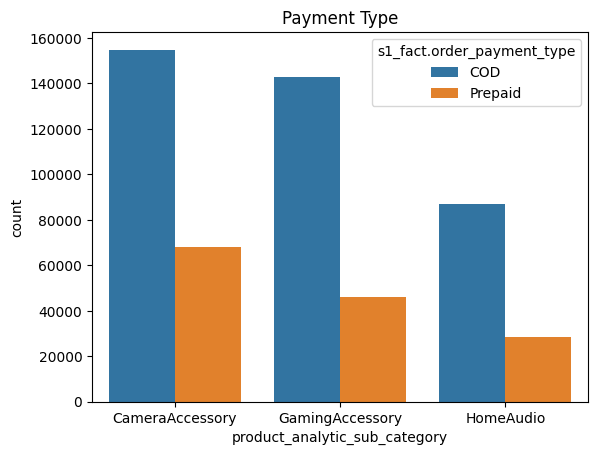

In [34]:
sns.countplot(data=df_new, x="product_analytic_sub_category", hue="s1_fact.order_payment_type")
plt.title("Payment Type")
plt.show()

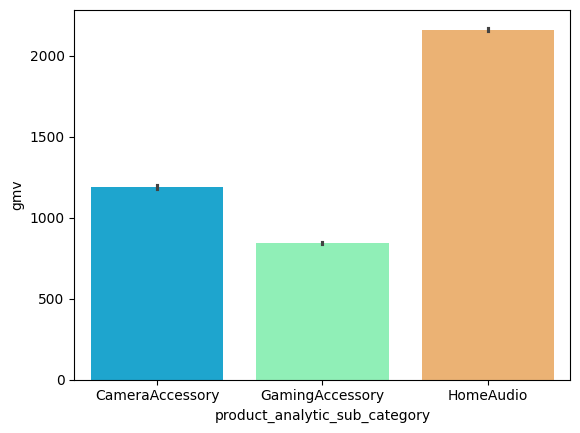

In [35]:
sns.barplot(data=df_new, x="product_analytic_sub_category", y="gmv", palette="rainbow")
plt.show()

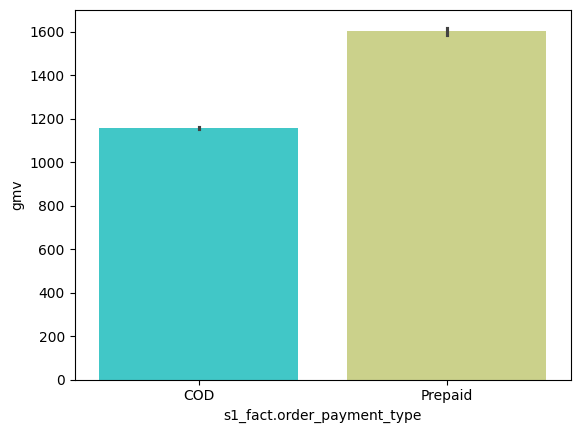

In [36]:
sns.barplot(data=df_new, x="s1_fact.order_payment_type", y="gmv", palette="rainbow")
plt.show()

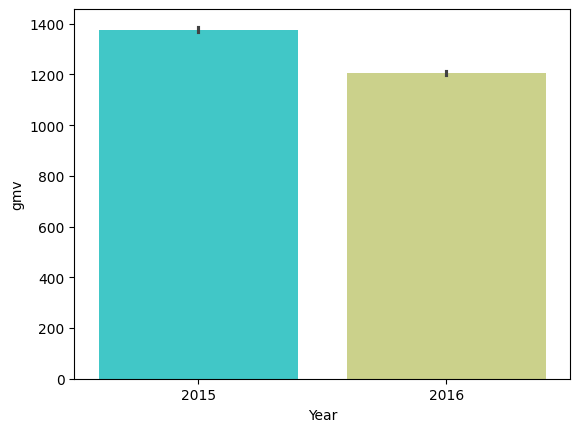

In [37]:
sns.barplot(data=df_new, x="Year", y="gmv", palette="rainbow")
plt.show()

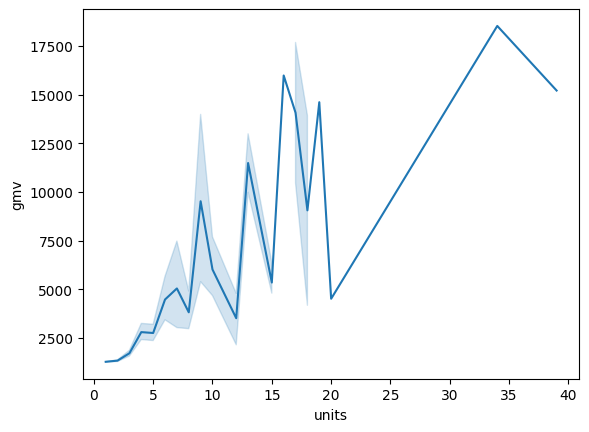

In [38]:
sns.lineplot(data=df_new, x ="units", y="gmv")
plt.show()

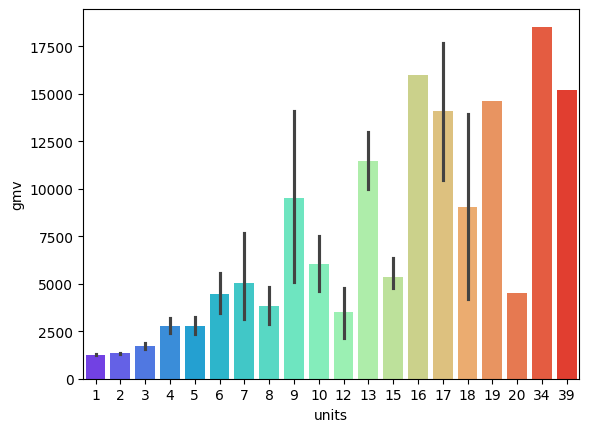

In [39]:
sns.barplot(data=df_new, x="units", y="gmv", palette="rainbow")
plt.show()

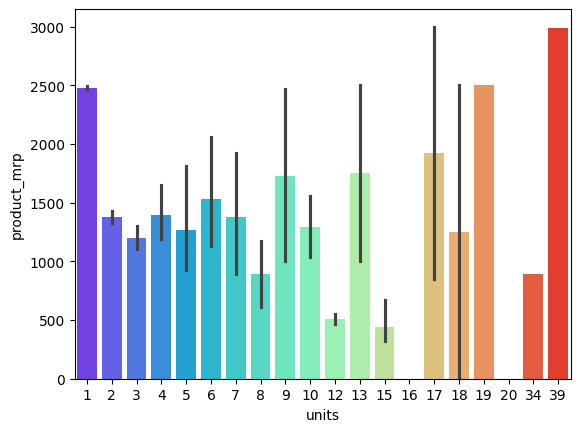

In [41]:
sns.barplot(data=df_new, x="units", y="product_mrp", palette="rainbow")
plt.show()

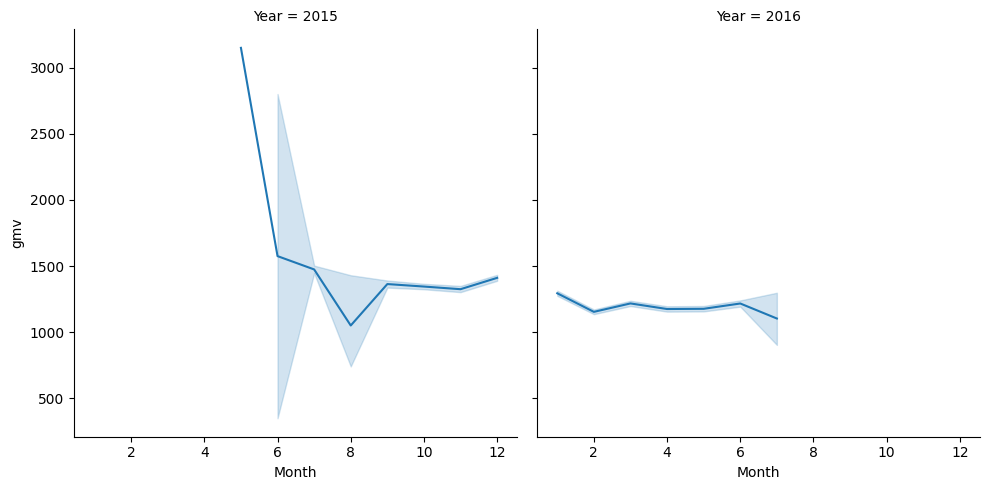

In [42]:
sns.relplot(data=df_new, x="Month", y="gmv", col="Year", kind="line")
plt.show()

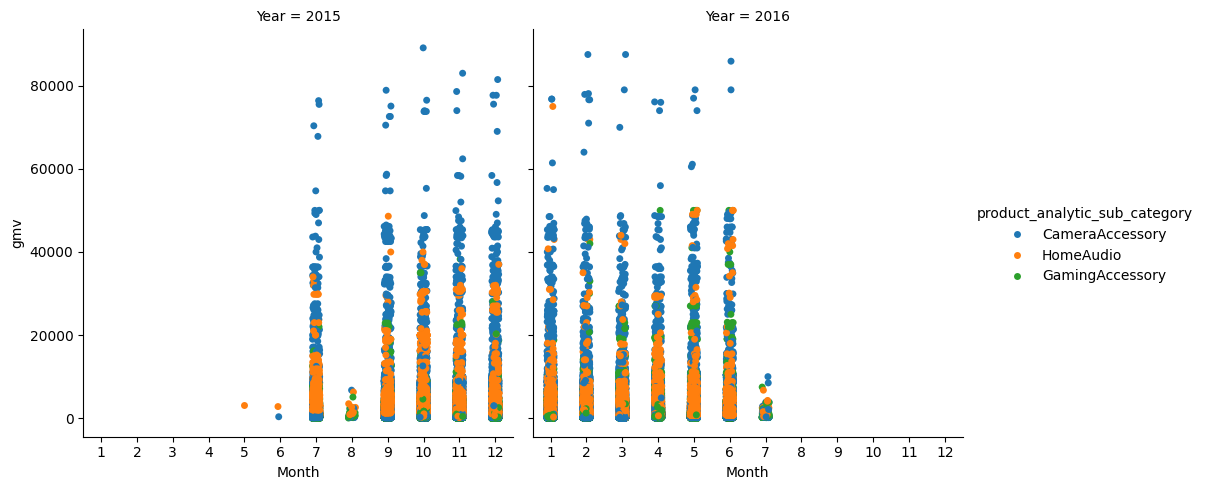

In [43]:
sns.catplot(data = df_new, x = "Month", y = "gmv", col = "Year", hue = "product_analytic_sub_category")
plt.show()

# Create a new column for week numbers

In [44]:

df_new['week_start_date'] = df_new['order_date'].dt.to_period('W').apply(lambda r: r.start_time)

In [45]:
df_new.shape

(527275, 21)

## Aggregate GMV and units sold per week for each sub-category

In [69]:
weekly_agg_data = df_new.groupby(
    ['product_analytic_sub_category', 'week_start_date']).agg(
    total_gmv=('gmv', 'sum'),
    total_units=('units', 'sum'),
    sla =('sla', 'mean')
).reset_index()

# Display a sample of the weekly aggregated data
weekly_agg_data.head()

product_analytic_sub_category week_start_date  total_gmv  total_units  \
0               CameraAccessory      2015-06-22      350.0            1   
1               CameraAccessory      2015-06-29    18196.0           28   
2               CameraAccessory      2015-07-06  4107249.0         3109   
3               CameraAccessory      2015-07-13  4748494.0         3324   
4               CameraAccessory      2015-07-20  4479476.0         3338   

        sla  
0  5.000000  
1  2.500000  
2  7.099529  
3  6.459409  
4  6.468584

In [47]:
weekly_agg_data.shape

(164, 4)

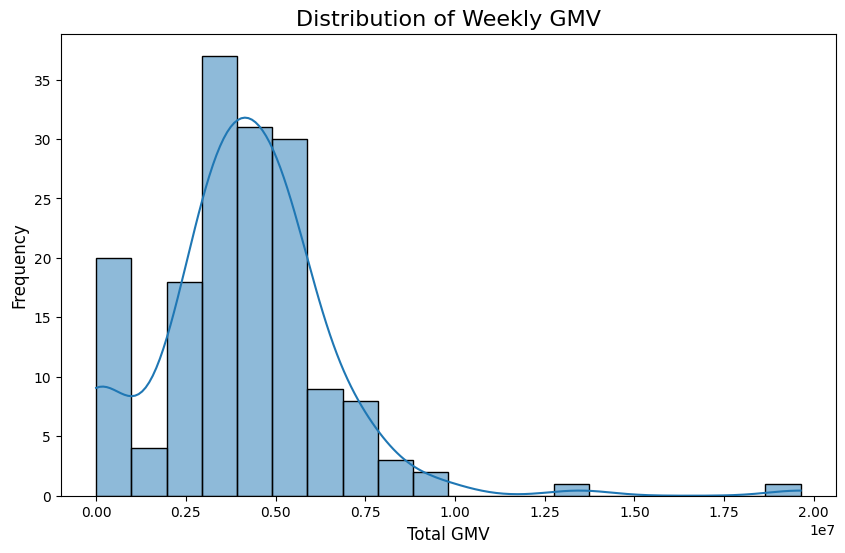

In [48]:
# Univariate Analysis: Distribution of GMV
plt.figure(figsize=(10, 6))
sns.histplot(weekly_agg_data['total_gmv'], bins=20, kde=True)
plt.title('Distribution of Weekly GMV', fontsize=16)
plt.xlabel('Total GMV', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

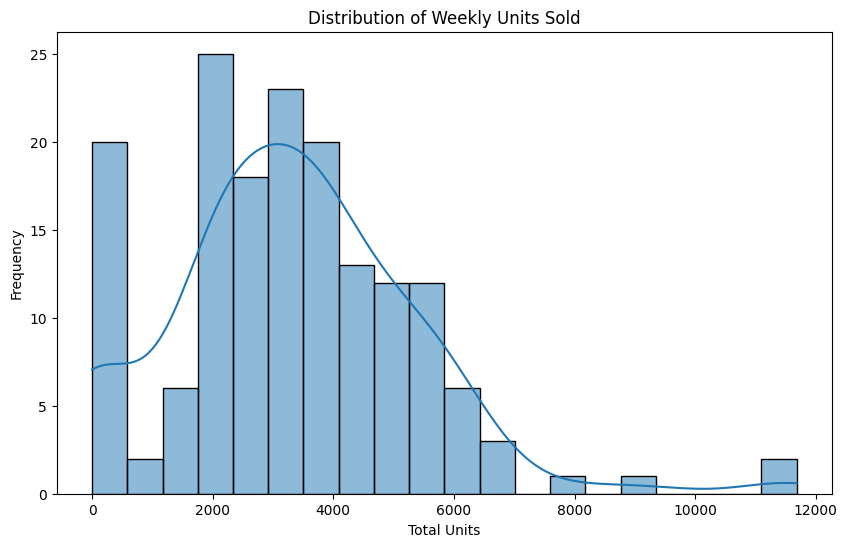

In [57]:
# Univariate Analysis: Distribution of Units Sold
plt.figure(figsize=(10, 6))
sns.histplot(weekly_agg_data['total_units'], bins=20, kde=True)
plt.title('Distribution of Weekly Units Sold')
plt.xlabel('Total Units')
plt.ylabel('Frequency')
plt.show()

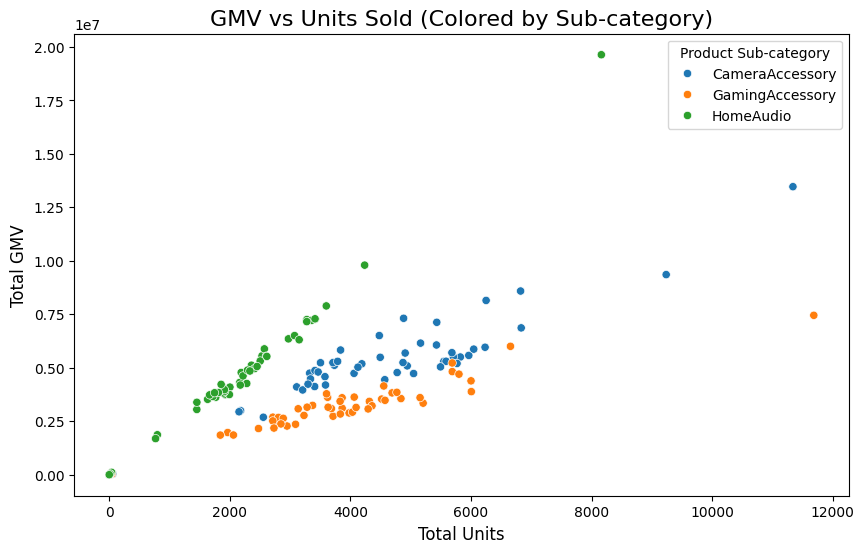

In [50]:
# Bivariate Analysis: GMV vs Units Sold
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_units', y='total_gmv', hue='product_analytic_sub_category', data=weekly_agg_data)
plt.title('GMV vs Units Sold (Colored by Sub-category)', fontsize=16)
plt.xlabel('Total Units', fontsize=12)
plt.ylabel('Total GMV', fontsize=12)
plt.legend(title='Product Sub-category')
plt.show()

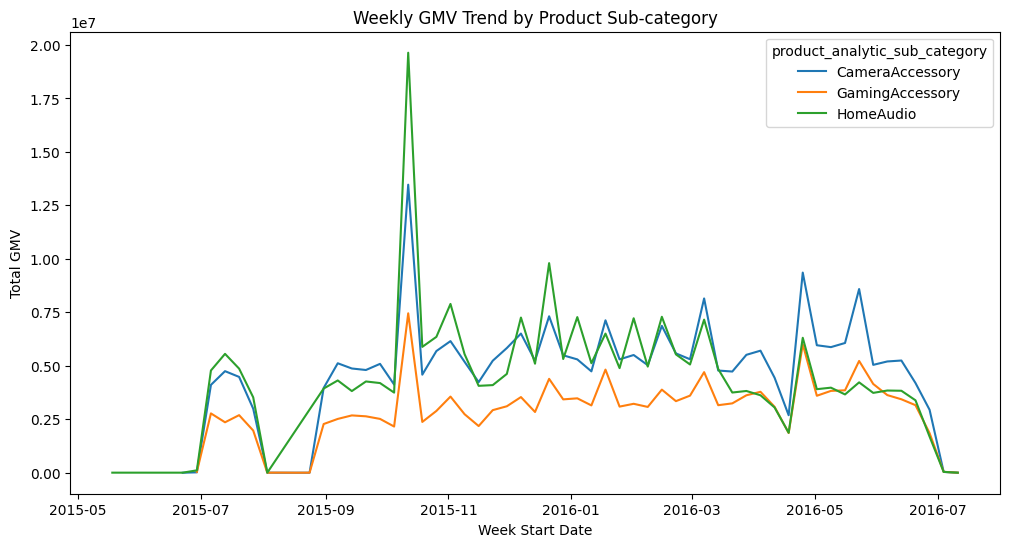

In [53]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='week_start_date', y='total_gmv', hue='product_analytic_sub_category', data=weekly_agg_data)
plt.title('Weekly GMV Trend by Product Sub-category')
plt.xlabel('Week Start Date')
plt.ylabel("Total GMV")
plt.show()

In [54]:
weekly_agg_data.head()

product_analytic_sub_category week_start_date  total_gmv  total_units
0               CameraAccessory      2015-06-22      350.0            1
1               CameraAccessory      2015-06-29    18196.0           28
2               CameraAccessory      2015-07-06  4107249.0         3109
3               CameraAccessory      2015-07-13  4748494.0         3324
4               CameraAccessory      2015-07-20  4479476.0         3338

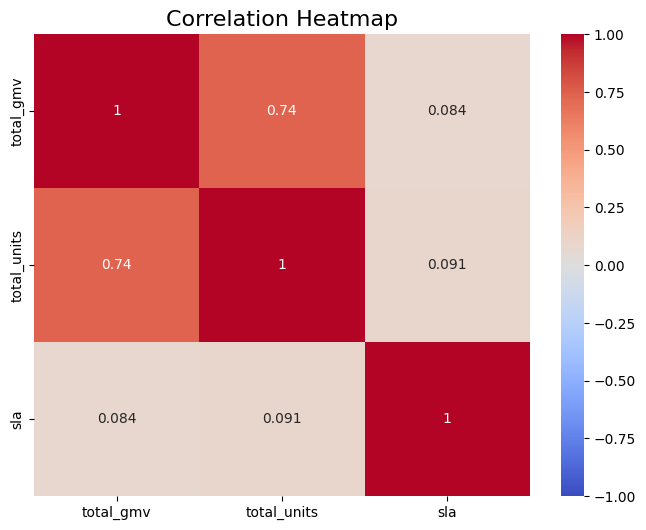

In [70]:
# Correlation Heatmap
corr_matrix = weekly_agg_data[['total_gmv', 'total_units',"sla"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

### Exploratory Data Analysis (EDA) Insights

1. **Distribution of Weekly GMV**:
   The histogram of total GMV shows that most weeks have a GMV clustered at lower values, but there are some high-value weeks, indicating the presence of outliers or peak sales periods.

2. **Distribution of Weekly Units Sold**:
  Similar to GMV, most weeks see a low number of units sold, but a few weeks have significantly higher sales, likely driven by promotions or holidays.

3. **Bivariate Analysis: GMV vs. Units Sold**:
   - The scatterplot shows a positive relationship between units sold and GMV. As the number of units sold increases, the GMV rises, which aligns with expectations.
   - The color-coded points indicate different sub-categories, with **CameraAccessory** often showing higher GMV for fewer units compared to **GamingAccessory** and **HomeAudio**.

4. **Weekly GMV Trend by Product Sub-category**:
   - The time series plot reveals seasonal trends in sales:
     - **CameraAccessory** shows periodic spikes, possibly around specific holidays or promotional campaigns.
     - **HomeAudio** and **GamingAccessory** exhibit smaller but more frequent fluctuations.

5. **Correlation Heatmap**:
   - There is a **strong positive correlation** between GMV and units sold, confirming that these two metrics move together.
   - **Average delivery days** has a strong correlation with GMV and units sold, indicating that faster deliveries might slightly improve sales performance.